In [ ]:
from tensorflow import keras
from keras import layers, models
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics, callbacks
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
pip install keras-rectified-adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.20.0-py3-none-any.whl size=8271 sha256=8dff9291cbd7dca0ce7688d2edb47c24c4584e3047bad44b7b546c2cf9cc73c0
  Stored in directory: /root/.cache/pip/wheels/5d/0c/92/c76f52204fb345e4495a09929ffa813a0d790e971f6064a6c9
Successfully built keras-rectified-adam


In [ ]:
from keras_radam import RAdam

#### 파일 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/dataset/data

Mounted at /content/drive
/content/drive/MyDrive/dataset/data


In [ ]:
%cd /content/drive/MyDrive/dataset/data

!unzip -qq "/content/drive/MyDrive/dataset/7가지_감정_표정_데이터.zip"

/content/drive/MyDrive/dataset/data
슬픔/01a6c69e76d729863380b8391d780e53070cf8629ad9ffd5d06826551271fe74_남_30_슬픔_도심 환경_20201207105401-008-001.jpg:  mismatching "local" filename (ьКмэФФ/01a6c69e76d729863380b8391d780e53070cf8629ad9ffd5d06826551271fe74_ыВи_30_ьКмэФФ_ыПДьЛм эЩШъ▓╜_20201207105401-008-001.jpg),
         continuing with "central" filename version
replace 슬픔/01a6c69e76d729863380b8391d780e53070cf8629ad9ffd5d06826551271fe74_남_30_슬픔_도심 환경_20201207105401-008-001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
spath = os.listdir()




X =[]
Y =[]

for index,label in enumerate(spath):
  dfdir = label + '/'
  for roots,dirs, files in os.walk(dfdir) :
    for file in files :
      img = cv2.imread(dfdir+file)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB, dst = img)
      img = cv2.resize(img,(90, 120),cv2.INTER_AREA) # cv2.INTER_AREA : 영역 보간법
      X.append(img)
      Y.append(label)

X = np.array(X)
Y = np.array(Y)

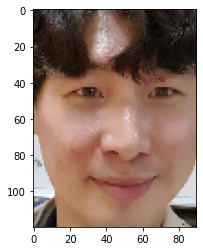

In [ ]:
plt.imshow(X[1])

In [ ]:
X[1].shape

(120, 90, 3)

In [ ]:
print(X.shape, Y.shape)

(2100, 120, 90, 3) (2100,)


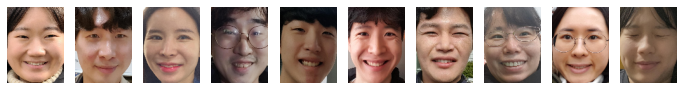

['joy' 'joy' 'joy' 'joy' 'joy' 'joy' 'joy' 'joy' 'joy' 'joy']


In [ ]:
fig, axs = plt.subplots(1, 10, figsize=(12,9))
for i in range(10) :
  axs[i].imshow(X[i])
  axs[i].axis('off')
plt.show()
print(Y[:10])

In [ ]:
from sklearn.preprocessing import LabelEncoder # 문자를 정수형 숫자로 바꿔줌

le = LabelEncoder()
le = le.fit(Y) # Fit lable encoder
Y = le.transform(Y) # Trasnform labels to normaized encoding 

In [ ]:
np.unique(Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([300, 300, 300, 300, 300, 300, 300]))

In [ ]:
X_scaled = X.reshape(-1, 90, 120, 3) / 255.0
X_scaled.shape

(2100, 90, 120, 3)

In [ ]:
X_scaled.shape

(2100, 90, 120, 3)

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

In [ ]:
val_input, test_input, val_target, test_target = train_test_split(test_input, test_target, test_size = 0.5, random_state = 42)

In [ ]:
print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)
print(test_input.shape, test_target.shape)

(1680, 90, 120, 3) (1680,)
(210, 90, 120, 3) (210,)
(210, 90, 120, 3) (210,)


##### 모델1 
 - activation='relu', padding='same' , dropout= 0.4, optimizer='RAdam'

In [ ]:
input_layer = tf.keras.layers.Input(shape=(90,120,3))
conv1_layer = tf.keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding='same')(input_layer)
pool1_layer = tf.keras.layers.MaxPooling2D(2)(conv1_layer)
conv2_layer = tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu', padding='same')(pool1_layer)
pool2_layer = tf.keras.layers.MaxPooling2D(2)(conv2_layer)
flt_layer = tf.keras.layers.Flatten()(pool2_layer)
dence_layer = tf.keras.layers.Dense(100,activation='relu')(flt_layer)
dropout_layer = tf.keras.layers.Dropout(0.4)(dence_layer)
output_layer = tf.keras.layers.Dense(7,activation='softmax')(dropout_layer)

model1 = tf.keras.models.Model(input_layer, output_layer)

model1.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 90, 120, 3)]      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 90, 120, 32)       896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 45, 60, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 45, 60, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 22, 30, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 42240)             0   

In [ ]:
model1.compile(RAdam(), loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=4,
                                                  restore_best_weights=True)

history = model1.fit(train_input, train_target, epochs=50,
                    validation_data=(val_input, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
53/53 [==============================] - 4s 39ms/step - loss: 1.4967 - accuracy: 0.3881 - val_loss: 1.6573 - val_accuracy: 0.3476
Epoch 2/50
53/53 [==============================] - 1s 20ms/step - loss: 1.5012 - accuracy: 0.3804 - val_loss: 1.6513 - val_accuracy: 0.3333
Epoch 3/50
53/53 [==============================] - 1s 17ms/step - loss: 1.5216 - accuracy: 0.3708 - val_loss: 1.6623 - val_accuracy: 0.3333
Epoch 4/50
53/53 [==============================] - 1s 17ms/step - loss: 1.4773 - accuracy: 0.3940 - val_loss: 1.6650 - val_accuracy: 0.3190
Epoch 5/50
53/53 [==============================] - 1s 17ms/step - loss: 1.4806 - accuracy: 0.3881 - val_loss: 1.6682 - val_accuracy: 0.3095
Epoch 6/50
53/53 [==============================] - 1s 17ms/step - loss: 1.4772 - accuracy: 0.4048 - val_loss: 1.6538 - val_accuracy: 0.3429


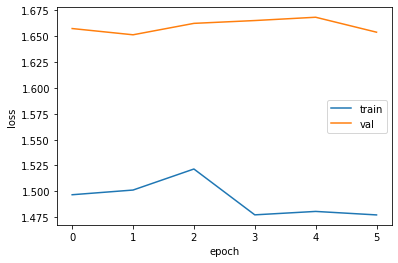

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
model1.evaluate(test_input, test_target)

7/7 [==============================] - 0s 8ms/step - loss: 1.6908 - accuracy: 0.3190


[1.6907514333724976, 0.31904762983322144]

##### 모델2
 - activation='relu', padding='vaild' , dropout= 0.2, optimizer='RAdam'

In [ ]:
input_layer = tf.keras.layers.Input(shape=(90,120,3))
conv1_layer = tf.keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding='valid')(input_layer)
pool1_layer = tf.keras.layers.MaxPooling2D(2)(conv1_layer)
conv2_layer = tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu', padding='valid')(pool1_layer)
pool2_layer = tf.keras.layers.MaxPooling2D(2)(conv2_layer)
flt_layer = tf.keras.layers.Flatten()(pool2_layer)
dence_layer = tf.keras.layers.Dense(100,activation='relu')(flt_layer)
dropout_layer = tf.keras.layers.Dropout(0.4)(dence_layer)
output_layer = tf.keras.layers.Dense(7,activation='softmax')(dropout_layer)

model2 = tf.keras.models.Model(input_layer, output_layer)

model2.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 90, 120, 3)]      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 88, 118, 32)       896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 44, 59, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 42, 57, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 21, 28, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 37632)             0  

In [ ]:
model2.compile(RAdam(), loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h4', 
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=4,
                                                  restore_best_weights=True)

history = model2.fit(train_input, train_target, epochs=50,
                    validation_data=(val_input, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 1.9715 - accuracy: 0.1280

53/53 [==============================] - 4s 44ms/step - loss: 1.9715 - accuracy: 0.1280 - val_loss: 1.9420 - val_accuracy: 0.1667
Epoch 2/50
52/53 [============================>.] - ETA: 0s - loss: 1.9451 - accuracy: 0.1538

53/53 [==============================] - 2s 34ms/step - loss: 1.9450 - accuracy: 0.1524 - val_loss: 1.9373 - val_accuracy: 0.2000
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 1.9360 - accuracy: 0.1673

53/53 [==============================] - 2s 34ms/step - loss: 1.9360 - accuracy: 0.1673 - val_loss: 1.9333 - val_accuracy: 0.2429
Epoch 4/50
53/53 [==============================] - ETA: 0s - loss: 1.9196 - accuracy: 0.2077

53/53 [==============================] - 2s 34ms/step - loss: 1.9196 - accuracy: 0.2077 - val_loss: 1.9059 - val_accuracy: 0.2429
Epoch 5/50
53/53 [==============================] - ETA: 0s - loss: 1.8927 - accuracy: 0.2208

53/53 [==============================] - 2s 35ms/step - loss: 1.8927 - accuracy: 0.2208 - val_loss: 1.8960 - val_accuracy: 0.2381
Epoch 6/50
53/53 [==============================] - ETA: 0s - loss: 1.8538 - accuracy: 0.2238

53/53 [==============================] - 2s 34ms/step - loss: 1.8538 - accuracy: 0.2238 - val_loss: 1.8543 - val_accuracy: 0.2381
Epoch 7/50
52/53 [============================>.] - ETA: 0s - loss: 1.7955 - accuracy: 0.2819

53/53 [==============================] - 2s 34ms/step - loss: 1.7964 - accuracy: 0.2815 - val_loss: 1.8266 - val_accuracy: 0.2762
Epoch 8/50
53/53 [==============================] - ETA: 0s - loss: 1.7410 - accuracy: 0.3065

53/53 [==============================] - 2s 40ms/step - loss: 1.7410 - accuracy: 0.3065 - val_loss: 1.7697 - val_accuracy: 0.3333
Epoch 9/50
53/53 [==============================] - 1s 18ms/step - loss: 1.7059 - accuracy: 0.3143 - val_loss: 1.8042 - val_accuracy: 0.2619
Epoch 10/50
52/53 [============================>.] - ETA: 0s - loss: 1.6452 - accuracy: 0.3311

53/53 [==============================] - 3s 49ms/step - loss: 1.6464 - accuracy: 0.3321 - val_loss: 1.7196 - val_accuracy: 0.3048
Epoch 11/50
50/53 [===========================>..] - ETA: 0s - loss: 1.6345 - accuracy: 0.3419

53/53 [==============================] - 2s 35ms/step - loss: 1.6331 - accuracy: 0.3429 - val_loss: 1.6622 - val_accuracy: 0.3667
Epoch 12/50
53/53 [==============================] - 1s 16ms/step - loss: 1.5762 - accuracy: 0.3768 - val_loss: 1.6925 - val_accuracy: 0.3333
Epoch 13/50
53/53 [==============================] - 1s 16ms/step - loss: 1.4813 - accuracy: 0.4196 - val_loss: 1.6634 - val_accuracy: 0.3381
Epoch 14/50
53/53 [==============================] - 1s 16ms/step - loss: 1.4674 - accuracy: 0.4125 - val_loss: 1.6753 - val_accuracy: 0.3476
Epoch 15/50
52/53 [============================>.] - ETA: 0s - loss: 1.4115 - accuracy: 0.4213

53/53 [==============================] - 2s 34ms/step - loss: 1.4126 - accuracy: 0.4208 - val_loss: 1.6394 - val_accuracy: 0.3476
Epoch 16/50
53/53 [==============================] - 1s 16ms/step - loss: 1.3418 - accuracy: 0.4619 - val_loss: 1.6786 - val_accuracy: 0.3429
Epoch 17/50
53/53 [==============================] - ETA: 0s - loss: 1.2842 - accuracy: 0.4911

53/53 [==============================] - 2s 33ms/step - loss: 1.2842 - accuracy: 0.4911 - val_loss: 1.6256 - val_accuracy: 0.3381
Epoch 18/50
53/53 [==============================] - 1s 16ms/step - loss: 1.2609 - accuracy: 0.5030 - val_loss: 1.7220 - val_accuracy: 0.3381
Epoch 19/50
53/53 [==============================] - 1s 16ms/step - loss: 1.2317 - accuracy: 0.5000 - val_loss: 1.6709 - val_accuracy: 0.3619
Epoch 20/50
53/53 [==============================] - 1s 17ms/step - loss: 1.1356 - accuracy: 0.5369 - val_loss: 1.6822 - val_accuracy: 0.3048
Epoch 21/50
53/53 [==============================] - 1s 16ms/step - loss: 1.1476 - accuracy: 0.5232 - val_loss: 1.6765 - val_accuracy: 0.3714


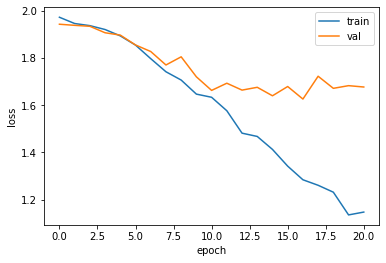

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
model2.evaluate(test_input, test_target)

7/7 [==============================] - 0s 7ms/step - loss: 1.6253 - accuracy: 0.3667


[1.625313639640808, 0.36666667461395264]

##### 모델3
 - activation='relu', padding='same' , dropout= 0.2, optimizer='RMSProp'

In [ ]:
input_layer = tf.keras.layers.Input(shape=(90,120,3))
conv1_layer = tf.keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding='same')(input_layer)
pool1_layer = tf.keras.layers.MaxPooling2D(2)(conv1_layer)
conv2_layer = tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu', padding='same')(pool1_layer)
pool2_layer = tf.keras.layers.MaxPooling2D(2)(conv2_layer)
flt_layer = tf.keras.layers.Flatten()(pool2_layer)
dence_layer = tf.keras.layers.Dense(100,activation='relu')(flt_layer)
dropout_layer = tf.keras.layers.Dropout(0.2)(dence_layer)
output_layer = tf.keras.layers.Dense(7,activation='softmax')(dropout_layer)

model3 = tf.keras.models.Model(input_layer, output_layer)

model3.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 90, 120, 3)]      0         
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 120, 32)       896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 45, 60, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 45, 60, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 22, 30, 64)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 42240)             0  

In [ ]:
model3.compile(optimizer='RMSProp', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h3', 
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=4,
                                                  
                                                  restore_best_weights=True)

history = model3.fit(train_input, train_target, epochs=50,
                    validation_data=(val_input, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
52/53 [============================>.] - ETA: 0s - loss: 2.5446 - accuracy: 0.1520

53/53 [==============================] - 2s 35ms/step - loss: 2.5389 - accuracy: 0.1536 - val_loss: 1.9483 - val_accuracy: 0.1667
Epoch 2/50
49/53 [==========================>...] - ETA: 0s - loss: 1.9432 - accuracy: 0.1888

53/53 [==============================] - 2s 30ms/step - loss: 1.9450 - accuracy: 0.1869 - val_loss: 1.9286 - val_accuracy: 0.2190
Epoch 3/50
53/53 [==============================] - 1s 14ms/step - loss: 1.9373 - accuracy: 0.2030 - val_loss: 1.9347 - val_accuracy: 0.1810
Epoch 4/50
49/53 [==========================>...] - ETA: 0s - loss: 1.8615 - accuracy: 0.2723

53/53 [==============================] - 2s 36ms/step - loss: 1.8548 - accuracy: 0.2744 - val_loss: 1.8673 - val_accuracy: 0.2190
Epoch 5/50
53/53 [==============================] - 1s 14ms/step - loss: 1.6982 - accuracy: 0.3565 - val_loss: 2.1249 - val_accuracy: 0.2143
Epoch 6/50
49/53 [==========================>...] - ETA: 0s - loss: 1.5722 - accuracy: 0.4330

53/53 [==============================] - 2s 30ms/step - loss: 1.5655 - accuracy: 0.4351 - val_loss: 1.7209 - val_accuracy: 0.3333
Epoch 7/50
53/53 [==============================] - 1s 15ms/step - loss: 1.3817 - accuracy: 0.4994 - val_loss: 2.0628 - val_accuracy: 0.2905
Epoch 8/50
53/53 [==============================] - 1s 15ms/step - loss: 1.1834 - accuracy: 0.5756 - val_loss: 1.8468 - val_accuracy: 0.3333
Epoch 9/50
53/53 [==============================] - 1s 15ms/step - loss: 0.9835 - accuracy: 0.6411 - val_loss: 1.7543 - val_accuracy: 0.3762
Epoch 10/50
53/53 [==============================] - 1s 15ms/step - loss: 0.8187 - accuracy: 0.7173 - val_loss: 2.1011 - val_accuracy: 0.3857


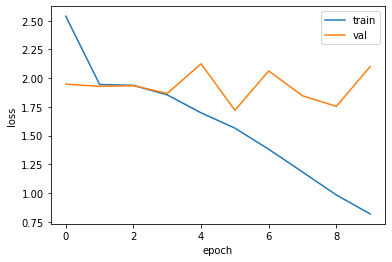

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
model3.evaluate(test_input, test_target)

7/7 [==============================] - 0s 7ms/step - loss: 1.8058 - accuracy: 0.2905


[1.8057749271392822, 0.2904762029647827]

##### 모델4
 - activation='elu', padding='same' , dropout= 0.4, optimizer='RAdam'

In [ ]:
input_layer = tf.keras.layers.Input(shape=(90,120,3))
conv1_layer = tf.keras.layers.Conv2D(32, kernel_size = 3, activation='elu', padding='same')(input_layer)
pool1_layer = tf.keras.layers.MaxPooling2D(2)(conv1_layer)
conv2_layer = tf.keras.layers.Conv2D(64, kernel_size = 3, activation='elu', padding='same')(pool1_layer)
pool2_layer = tf.keras.layers.MaxPooling2D(2)(conv2_layer)
flt_layer = tf.keras.layers.Flatten()(pool2_layer)
dence_layer = tf.keras.layers.Dense(100,activation='elu')(flt_layer)
dropout_layer = tf.keras.layers.Dropout(0.4)(dence_layer)
output_layer = tf.keras.layers.Dense(7,activation='softmax')(dropout_layer)

model4 = tf.keras.models.Model(input_layer, output_layer)

model4.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 90, 120, 3)]      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 90, 120, 32)       896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 45, 60, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 45, 60, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 22, 30, 64)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 42240)             0  

In [ ]:
model4.compile(RAdam(), loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h2', 
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=4,
                                                  restore_best_weights=True)

history = model4.fit(train_input, train_target, epochs=50,
                    validation_data=(val_input, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
51/53 [===========================>..] - ETA: 0s - loss: 2.0365 - accuracy: 0.1550

53/53 [==============================] - 3s 38ms/step - loss: 2.0332 - accuracy: 0.1554 - val_loss: 1.9115 - val_accuracy: 0.2429
Epoch 2/50
50/53 [===========================>..] - ETA: 0s - loss: 1.8068 - accuracy: 0.2981

53/53 [==============================] - 2s 35ms/step - loss: 1.8052 - accuracy: 0.3030 - val_loss: 1.7742 - val_accuracy: 0.2571
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 1.6215 - accuracy: 0.3845

53/53 [==============================] - 2s 34ms/step - loss: 1.6215 - accuracy: 0.3845 - val_loss: 1.7471 - val_accuracy: 0.3286
Epoch 4/50
52/53 [============================>.] - ETA: 0s - loss: 1.4285 - accuracy: 0.4904

53/53 [==============================] - 2s 35ms/step - loss: 1.4280 - accuracy: 0.4899 - val_loss: 1.6952 - val_accuracy: 0.3476
Epoch 5/50
51/53 [===========================>..] - ETA: 0s - loss: 1.2586 - accuracy: 0.5735

53/53 [==============================] - 2s 39ms/step - loss: 1.2568 - accuracy: 0.5726 - val_loss: 1.6832 - val_accuracy: 0.3810
Epoch 6/50
52/53 [============================>.] - ETA: 0s - loss: 1.0705 - accuracy: 0.6304

53/53 [==============================] - 2s 38ms/step - loss: 1.0701 - accuracy: 0.6310 - val_loss: 1.6467 - val_accuracy: 0.3476
Epoch 7/50
53/53 [==============================] - 1s 16ms/step - loss: 0.8725 - accuracy: 0.7125 - val_loss: 1.7497 - val_accuracy: 0.4048
Epoch 8/50
53/53 [==============================] - 1s 17ms/step - loss: 0.7256 - accuracy: 0.7696 - val_loss: 1.8987 - val_accuracy: 0.3476
Epoch 9/50
53/53 [==============================] - 1s 17ms/step - loss: 0.5388 - accuracy: 0.8351 - val_loss: 1.9320 - val_accuracy: 0.3667
Epoch 10/50
53/53 [==============================] - 1s 17ms/step - loss: 0.4335 - accuracy: 0.8839 - val_loss: 1.9972 - val_accuracy: 0.3952


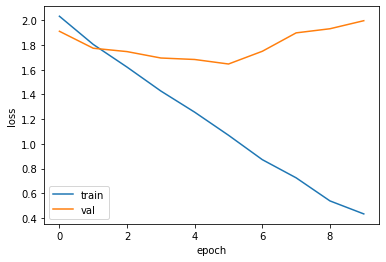

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
model4.evaluate(test_input, test_target)

7/7 [==============================] - 0s 7ms/step - loss: 1.7008 - accuracy: 0.3714


[1.7007505893707275, 0.37142857909202576]

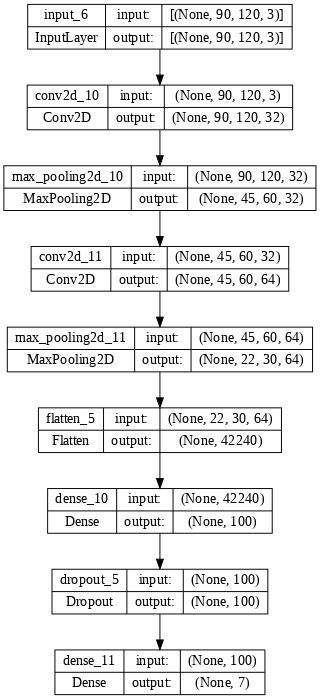

In [ ]:
keras.utils.plot_model(model1, show_shapes=True, dpi=70 )